In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("../datasets/wine_data.csv",usecols=[0,1,2],header=None)
df.columns =["Class label", "Alcohol","Malic Acid"]

In [8]:
df.sample(5)

,Class label,Alcohol,Malic Acid
82,2,12.08,1.13
174,3,13.40,3.91
98,2,12.37,1.07
157,3,12.45,3.03
26,1,13.39,1.77


<AxesSubplot: xlabel='Alcohol', ylabel='Density'>

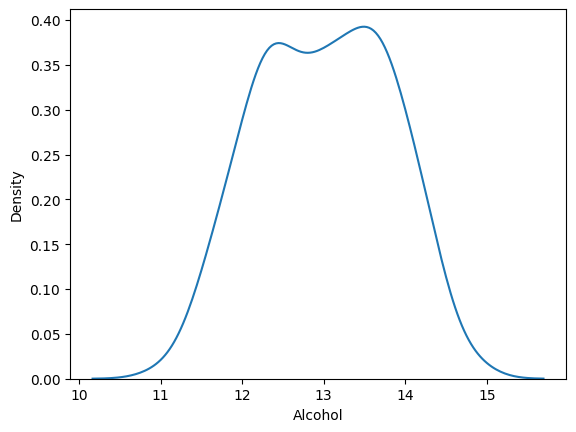

In [9]:
sns.kdeplot(df["Alcohol"])

<AxesSubplot: xlabel='Malic Acid', ylabel='Density'>

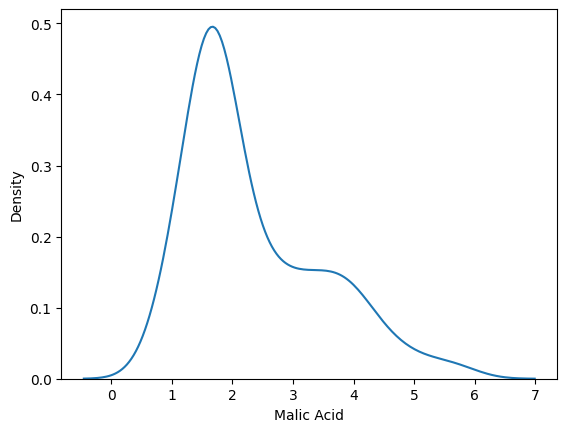

In [10]:
sns.kdeplot(df["Malic Acid"])

<AxesSubplot: xlabel='Alcohol', ylabel='Malic Acid'>

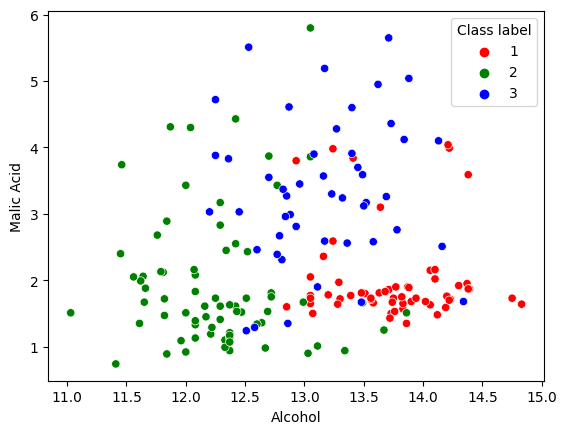

In [15]:
color_dict = {1:'red',2:'green',3:'blue'}
sns.scatterplot(data=df,x="Alcohol", y="Malic Acid",hue=df["Class label"],palette=color_dict)

## As usual Always perform train test split before scaling your data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(df[["Alcohol", "Malic Acid"]], df["Class label"],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

### Normalization using MinMax Scaler (Most common)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Converting the received numpy arrays into readable dataframe objects

In [19]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [20]:
X_train_scaled.sample(5)

,Alcohol,Malic Acid
49,0.897849,0.222689
112,0.510753,0.403361
113,0.163978,0.245798
107,0.454301,0.193277
66,0.260753,0.533613


### Lets visualize the changes

<AxesSubplot: title={'center': 'After scaling'}, xlabel='Alcohol', ylabel='Malic Acid'>

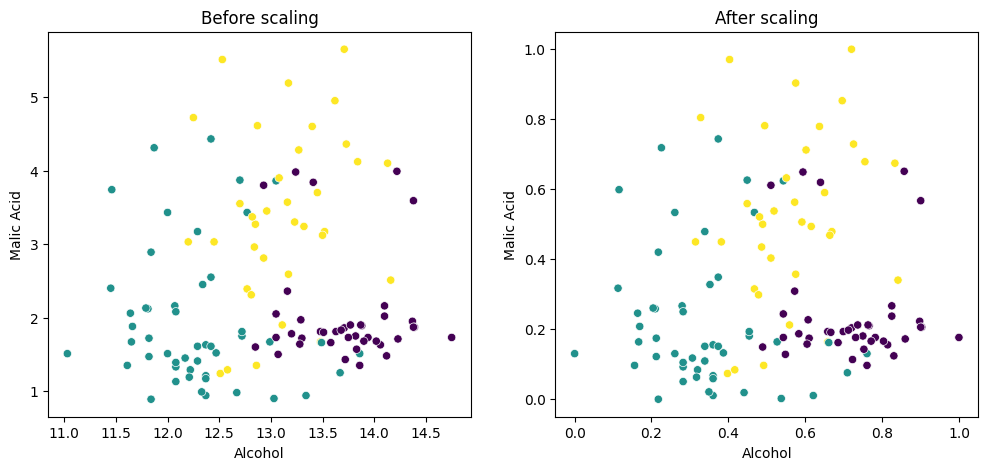

In [23]:
fig, (ax1, ax2) =  plt.subplots(1,2,figsize=(12,5))

ax1.set_title("Before scaling")
sns.scatterplot(data=X_train, x="Alcohol",y="Malic Acid", c=Y_train, ax=ax1)


ax2.set_title("After scaling")
sns.scatterplot(data=X_train_scaled, x="Alcohol",y="Malic Acid", c=Y_train, ax=ax2)




<AxesSubplot: title={'center': 'After scaling'}, xlabel='Alcohol', ylabel='Density'>

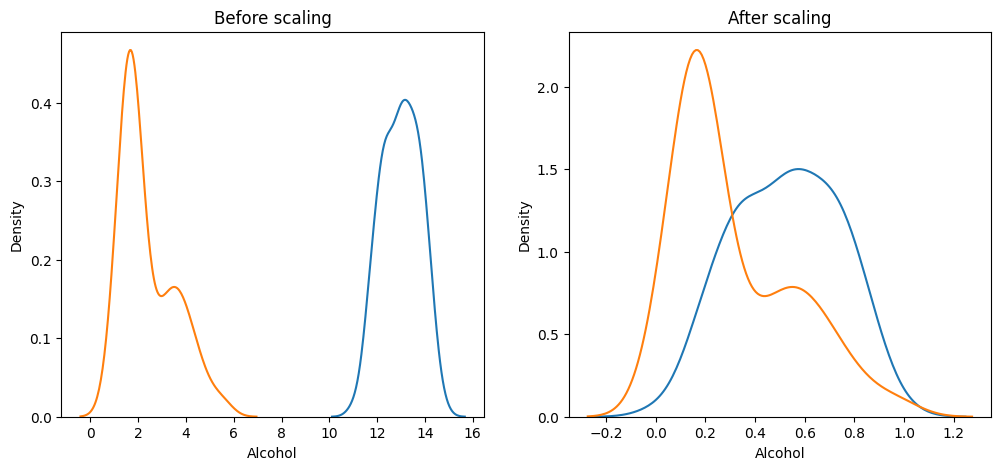

In [24]:
fig, (ax1, ax2) =  plt.subplots(1,2,figsize=(12,5))

ax1.set_title("Before scaling")
sns.kdeplot(X_train["Alcohol"], ax=ax1)
sns.kdeplot(X_train["Malic Acid"], ax=ax1)


ax2.set_title("After scaling")
sns.kdeplot(X_train_scaled["Alcohol"], ax=ax2)
sns.kdeplot(X_train_scaled["Malic Acid"], ax=ax2)


